
**Task 2: Noise, Noise, and More Noise**


1.	Noise Model

A standard way to represent the noise in a quantum circuit through pauli operators (https://en.wikipedia.org/wiki/Pauli_matrices) (pauli x, pauli y, pauli z). Build a function with with input alpha, beta and QauntumCircuit where:



*   alpha --> probability of having a random pauli operator acting on the qubit after a one-qubit gate.

*   beta --> probability of having a random pauli operator acting on the qubit after a two-qubit gate.

*   QuantumCircuit --> Quantum circuit where the noise will be added.

The output should be the Quantum Circuit with Noise.









In [2]:
#install necessary libraries
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-Aer
# !pip install qiskit-transpile
!pip install qiskit-visualization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=5e1340f4f95e94a6a1d89a620170d694c327d0790e0c45a21f896212e627c927
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.7 MB/s eta 0:00:00
ERROR: Could not find a version 

In [3]:
#import necessary libraries
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
import random
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

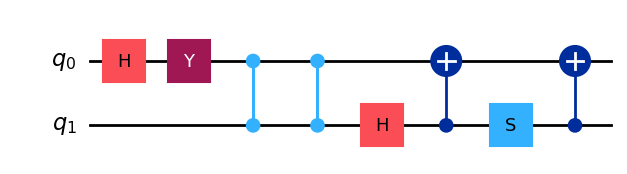

In [4]:

from qiskit.circuit.library import XGate, YGate, ZGate, HGate, SGate, TGate, IGate, CXGate, CZGate
from qiskit import QuantumCircuit
import random

# Define the noise model parameters
alpha = 0.5
beta = 0.5

#
def noise_model(alpha, beta, qc):

  random_gate1 = [XGate(), YGate(), ZGate(), HGate(), SGate(), TGate(), IGate()]
  random_gate2 = [CXGate(), CZGate()]

  for i in range(qc.num_qubits):  # Iterate using num_qubits
    qc.append(random.choice(random_gate1), [i])
    if qc.num_qubits > 1:  # Apply two-qubit gates only if there are at least 2 qubits
      qc.append(random.choice(random_gate2), [i % qc.num_qubits, (i + 1) % qc.num_qubits])
    if random.random() < alpha:
      qc.append(random.choice(random_gate1), [i])  # Apply one-qubit gate with probability alpha
    if random.random() < beta and qc.num_qubits > 1:  # Apply two-qubit gate with probability beta
      qc.append(random.choice(random_gate2), [i % qc.num_qubits, (i + 1) % qc.num_qubits])
  return qc

circuit = QuantumCircuit(2)
circuit.h(0)
noisy_circuit = noise_model(alpha, beta, circuit)
noisy_circuit.draw("mpl")


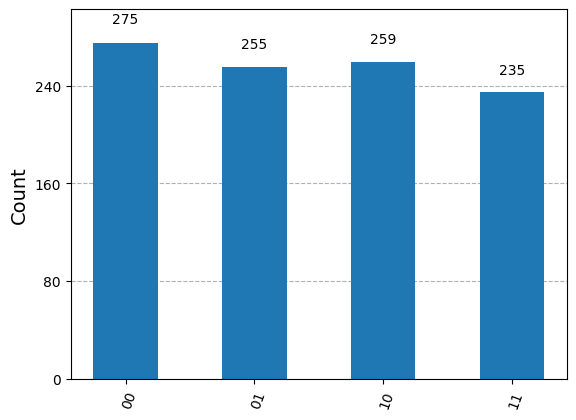

In [5]:
# noisy_circuit.measure_all()
""" If no noise changes the probabilities significantly,
you'll still see results like 00 and 10 more frequently due to the superposition created by the Hadamard gate. However, noise might introduce other outcomes like 01 and 11 as well,
albeit potentially with lower probabilities."""
simulator = AerSimulator()
noisy_circuit.measure_all()
job = simulator.run(noisy_circuit)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)


2.	Gate Basis


Quantum computers can implement only a set of gates that, with transformations, can represent any other possible gate. This set of gates is called the Gate Basis of the QPU. Build a function that transforms a general Quantum Circuit to the following gate basis: {CX,ID,RZ,SX,X}


In [6]:
# use transpilation

def gate_basis(qc):
  basis_gates = ["cx", "id", "rz", "sx", "x"]
  transpiled_circuit = transpile(qc, basis_gates=basis_gates)
  return transpiled_circuit

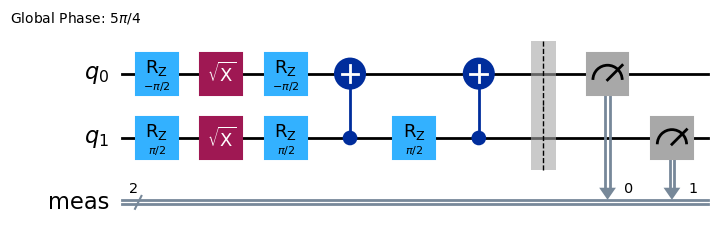

In [7]:
transpiled_circuit = gate_basis(circuit)
transpiled_circuit.draw("mpl")

3.	Adding two numbers with a quantum computer

Build a function (quantum_sum) to add two numbers using the Draper adder algorithm. You will need the Quantum Fourier Transform (QFT). Many libraries offer a function to use it. For this task, you will need to build QFT from scratch.

In [57]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import DraperQFTAdder
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

# Define the quantum sum function using the Draper QFT adder
def quantum_sum(a, b):
    # Initialize the AerSimulator backend
    backend = AerSimulator()

    # Set up the Draper adder with 3 qubits for each input
    adder = DraperQFTAdder(num_state_qubits=3)

    # Create a quantum circuit with 6 qubits: 3 for each number
    adder_circuit = QuantumCircuit(6, 3)

    # Initialize the first input register (qubits 0-2) to represent number 'a' in binary
    for i in range(3):
        if (a >> i) & 1:  # Check if the i-th bit of 'a' is 1
            adder_circuit.x(i)

    # Initialize the second input register (qubits 3-5) to represent number 'b' in binary
    for i in range(3):
        if (b >> i) & 1:  # Check if the i-th bit of 'b' is 1
            adder_circuit.x(i + 3)

    # Append the Draper QFT adder to add the two registers
    adder_circuit.append(adder, [0, 1, 2, 3, 4, 5])

    # Add a barrier for visual separation
    adder_circuit.barrier()

    # Measure the result stored in the second register (qubits 3-5)
    adder_circuit.measure(3, 0)
    adder_circuit.measure(4, 1)
    adder_circuit.measure(5, 2)

    # Run the circuit on the simulator and get results
    job = backend.run(transpile(adder_circuit, backend), shots=1024)
    res_dict = job.result().get_counts()
    result_sum = max(res_dict, key=res_dict.get)

    # Convert the measurement result to an integer
    sum_result = int(result_sum, 2)

    return sum_result

# Example usage
a = 2
b = 2
print(f"{a} + {b} = {quantum_sum(a, b)}")


2 + 2 = 4


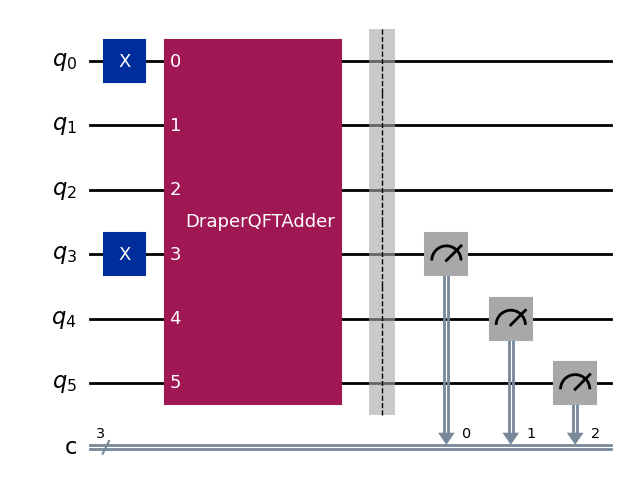

In [58]:
adder_circuit.draw('mpl')

4.	Effects of noise on quantum addition

Now, we can combine all the functions. Transform the circuit used in the quantum_sum to the gate basis and add noise. Use different levels of noise and analyze the results.

●	How does the noise affect the results?

●	Is there a way to decrease the effect of noise?


●	How does the number of gates used affect the results?


In [69]:
# create a noisy function
def noisy_sum(a, b, alpha_vals, beta_vals):
    backend = AerSimulator()
    results = {}

    for alpha in alpha_vals:
        for beta in beta_vals:
            qc = quantum_sum(a, b)

            # Create a noise model
            noise_model = NoiseModel()
            error_1 = depolarizing_error(alpha, 1)  # Single-qubit depolarizing error
            error_2 = depolarizing_error(beta, 2)   # Two-qubit depolarizing error
            noise_model.add_all_qubit_quantum_error(error_1, ['x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg'])
            noise_model.add_all_qubit_quantum_error(error_2, ['cx', 'cy', 'cz', 'swap'])
            # measure
            qc.measure_all()

            # Transpile the circuit with noise model
            transpiled_qc = transpile(qc, backend)

            # Run the simulation
            job = backend.run(transpiled_qc, noise_model=noise_model, shots=1024)
            res_dict = job.result().get_counts()
            results[(alpha, beta)] = res_dict

    return results

# Define parameters
a = 1  # First number to add
b = 2  # Second number to add
alpha_vals = [0.01, 0.05, 0.1]  # Noise levels for single-qubit gates
beta_vals = [0.01, 0.05, 0.1]   # Noise levels for two-qubit gates

# Execute the noisy sum function
results = noisy_sum(a, b, alpha_vals, beta_vals)

# Print the results for analysis
for (alpha, beta), counts in results.items():
    print(f"Alpha: {alpha}, Beta: {beta}, Counts: {counts}")



Alpha: 0.01, Beta: 0.01, Counts: {'100001 100': 6, '010001 010': 3, '001001 001': 7, '110001 110': 1, '000001 000': 1, '111001 111': 16, '010000 010': 2, '101001 101': 4, '011001 011': 984}
Alpha: 0.01, Beta: 0.05, Counts: {'001001 001': 4, '100001 100': 7, '000001 000': 1, '111001 111': 11, '010001 010': 3, '010000 010': 4, '101001 101': 8, '011001 011': 986}
Alpha: 0.01, Beta: 0.1, Counts: {'100001 100': 2, '010001 010': 7, '110001 110': 1, '000001 000': 2, '111001 111': 7, '001001 001': 15, '101001 101': 10, '010000 010': 4, '011001 011': 976}
Alpha: 0.05, Beta: 0.01, Counts: {'101000 101': 1, '000000 000': 1, '011000 011': 1, '100001 100': 21, '010001 010': 12, '110001 110': 2, '000001 000': 3, '111001 111': 44, '001001 001': 52, '010000 010': 18, '101001 101': 20, '011001 011': 849}
Alpha: 0.05, Beta: 0.05, Counts: {'001000 001': 1, '011000 011': 2, '110000 110': 1, '000000 000': 2, '100001 100': 22, '010001 010': 20, '010000 010': 24, '101001 101': 24, '011001 011': 837, '000001 

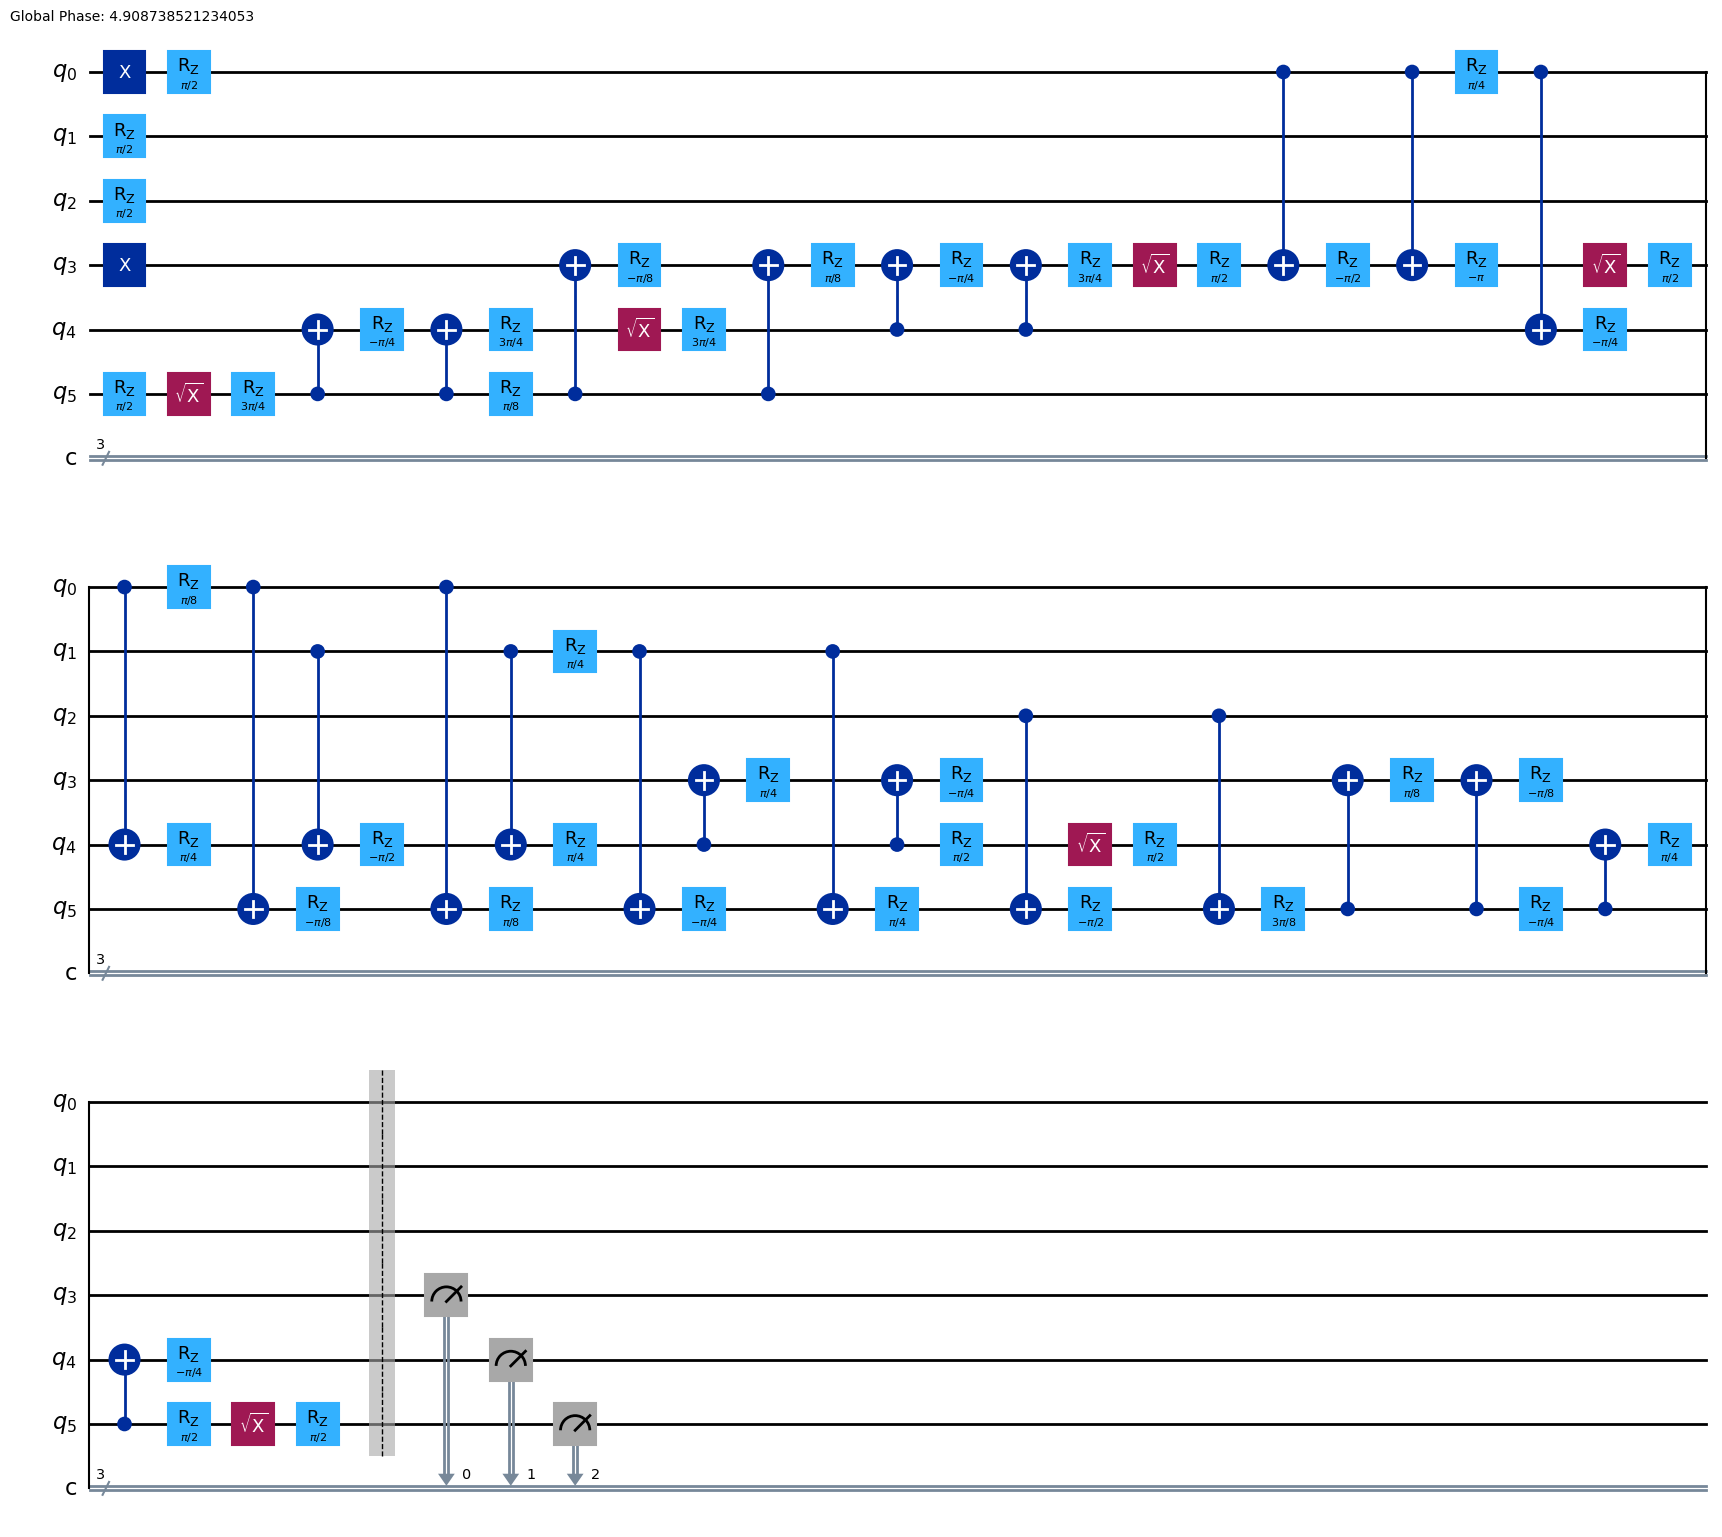

In [70]:
transpilation.draw('mpl')